In this Notebook we plot several graphs from a dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

Saving HotelCustomersDataset.xlsx to HotelCustomersDataset (1).xlsx


<ipython-input-3-a4542bc86f28>:7: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")


In [ ]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Task1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

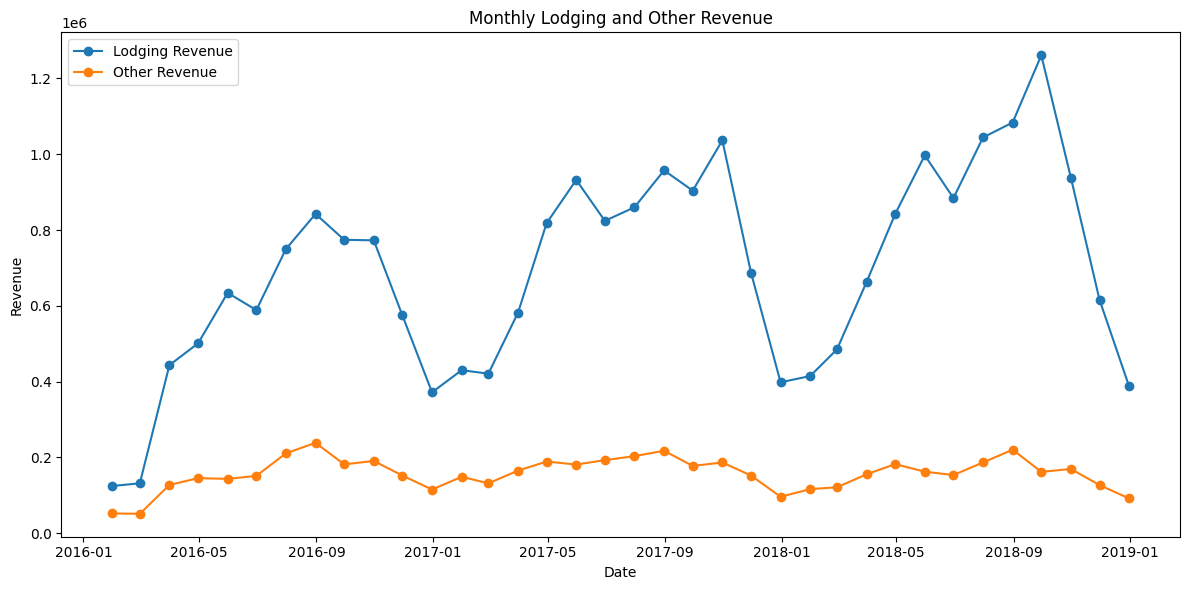

In [ ]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})

monthly_revenue = daily_revenue.resample("M").sum()

# Create a line chart
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Extract the date, LodgingRevenue, and OtherRevenue columns from the DataFrame
dates = monthly_revenue.index  # Assuming the date is set as the index
lodging_revenue = monthly_revenue['LodgingRevenue']
other_revenue = monthly_revenue['OtherRevenue']

# Plot the LodgingRevenue and OtherRevenue
plt.plot(dates, lodging_revenue, label='Lodging Revenue', marker='o', linestyle='-', markersize=6)
plt.plot(dates, other_revenue, label='Other Revenue', marker='o', linestyle='-', markersize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Lodging and Other Revenue')
plt.legend()  # Display legend

# Show the plot
plt.tight_layout()  # Ensure the labels fit in the plot area
plt.show()

# Task 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.



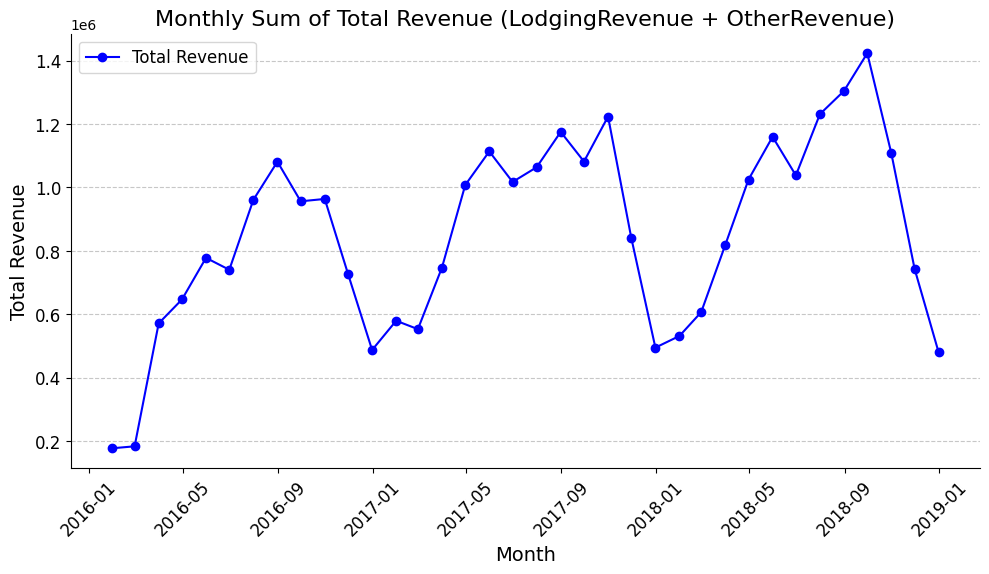

In [ ]:
# Calculate the total monthly revenue by summing LodgingRevenue and OtherRevenue
monthly_revenue['TotalRevenue'] = monthly_revenue['LodgingRevenue'] + monthly_revenue['OtherRevenue']

# Create the line chart
plt.figure(figsize=(10, 6))

# Plot the total monthly revenue as a line chart
plt.plot(
    monthly_revenue.index,
    monthly_revenue['TotalRevenue'],
    label='Total Revenue',
    marker='o',
    linestyle='-',
    color='b'
)

# Add labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.title('Monthly Sum of Total Revenue (LodgingRevenue + OtherRevenue)', fontsize=16)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a legend
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set font size for y-axis tick labels
plt.yticks(fontsize=12)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

# Task 3: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help).

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.



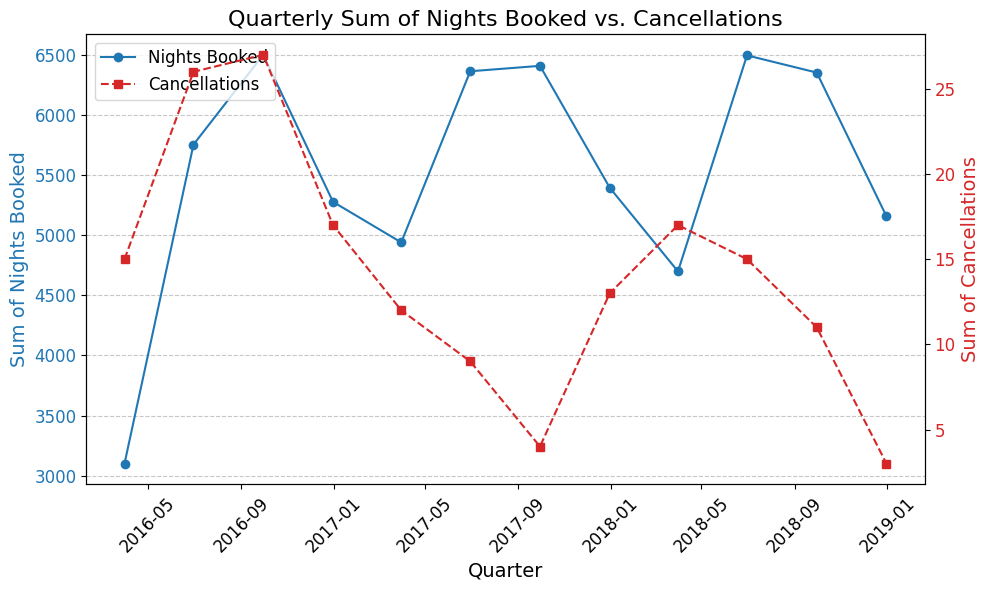

In [ ]:
# Convert the 'date' column to a datetime object if it's not already
hotels['date'] = pd.to_datetime(hotels['date'])

# Group data by quarter and calculate the sum of nights booked and the sum of cancellations
quarterly_data = hotels.set_index('date').resample("Q")['BookingsCheckedIn', 'BookingsCanceled'].sum()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the sum of nights booked on the first Y-axis
color = 'tab:blue'
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Sum of Nights Booked', color=color, fontsize=14)
ax1.plot(quarterly_data.index, quarterly_data['BookingsCheckedIn'], label='Nights Booked', color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second Y-axis for the sum of cancellations
ax2 = ax1.twinx()  # Share the same X-axis
color = 'tab:red'
ax2.set_ylabel('Sum of Cancellations', color=color, fontsize=14)
ax2.plot(quarterly_data.index, quarterly_data['BookingsCanceled'], label='Cancellations', color=color, marker='s', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Add titles
plt.title('Quarterly Sum of Nights Booked vs. Cancellations', fontsize=16)

# Remove scientific notation on the Y-axes
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# Set font size for tick labels
ax1.tick_params(axis='x', labelrotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Task4: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

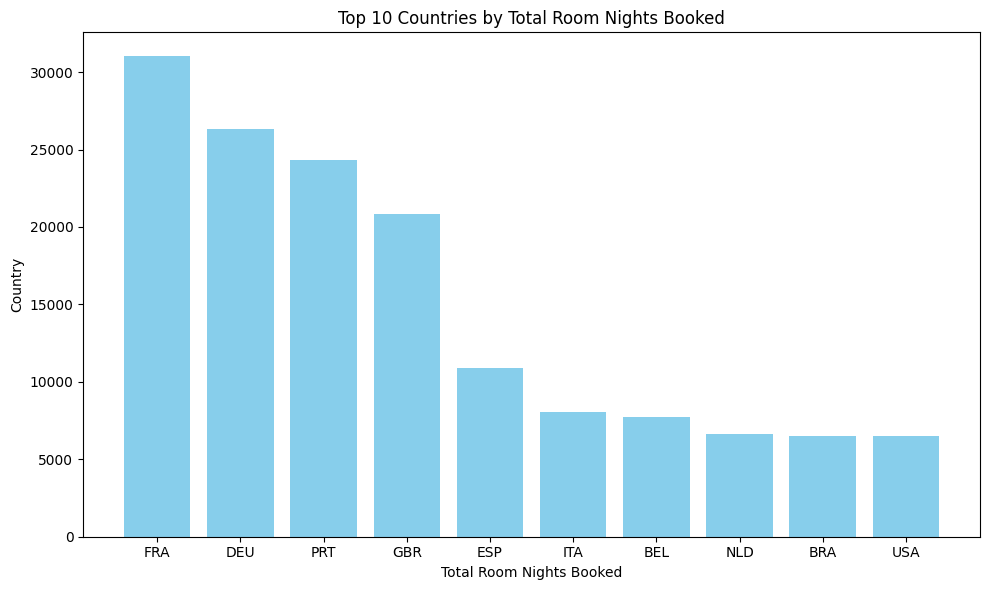

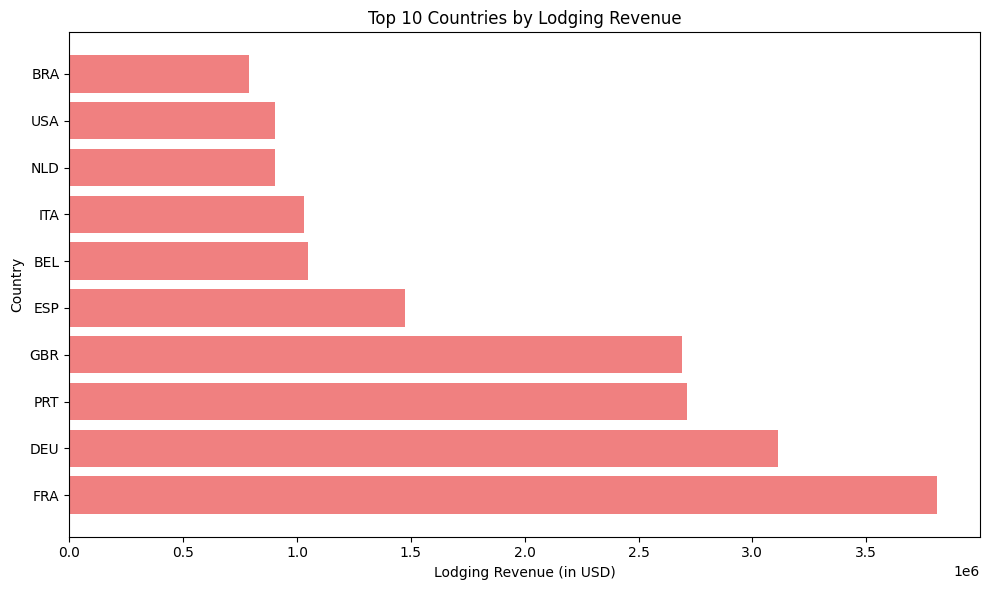

In [ ]:
# Group the data by 'Nationality' and calculate the total room nights booked for each country
room_nights_by_country = hotels.groupby('Nationality')['RoomNights'].sum().reset_index()

# Sort the data by total room nights in descending order and select the top 10 countries
top_10_countries_room_nights = room_nights_by_country.sort_values(by='RoomNights', ascending=False).head(10)

# Create a bar chart for total room nights booked by country
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_room_nights['Nationality'], top_10_countries_room_nights['RoomNights'], color='skyblue')
plt.xlabel('Total Room Nights Booked')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Room Nights Booked')
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest value at the top
plt.tight_layout()

# Display the bar chart
plt.show()

# Group the data by 'Nationality' and calculate the total lodging revenue for each country
lodging_revenue_by_country = hotels.groupby('Nationality')['LodgingRevenue'].sum().reset_index()

# Sort the data by lodging revenue in descending order and select the top 10 countries
top_10_countries_lodging_revenue = lodging_revenue_by_country.sort_values(by='LodgingRevenue', ascending=False).head(10)

# Create a horizontal bar chart for lodging revenue by country
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries_lodging_revenue['Nationality'], top_10_countries_lodging_revenue['LodgingRevenue'], color='lightcoral')
plt.xlabel('Lodging Revenue (in USD)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Lodging Revenue')
plt.tight_layout()

# Display the horizontal bar chart
plt.show()

# Task 5: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline.



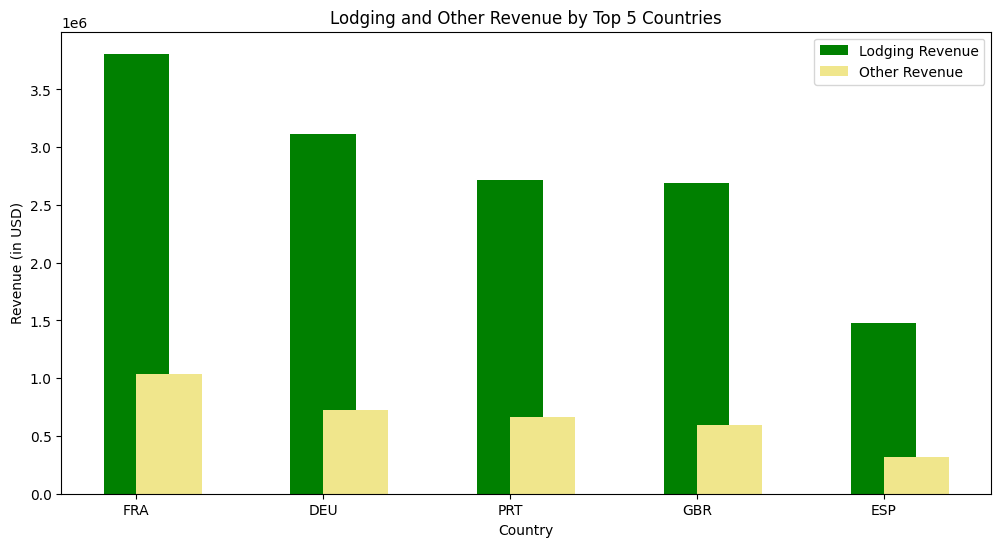

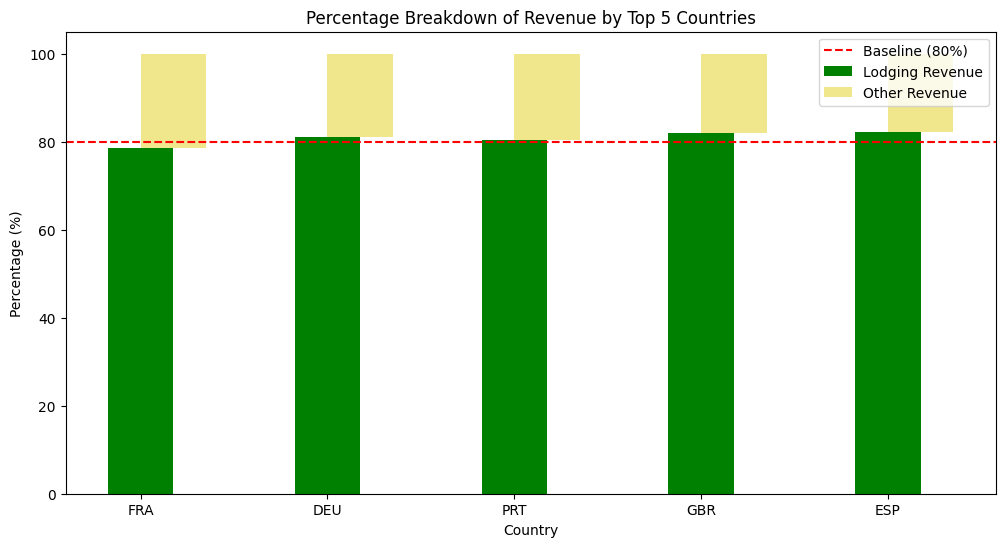

In [ ]:
# Group the data by 'Nationality' and calculate the total revenue for each country
revenue_by_country = hotels.groupby('Nationality')[['LodgingRevenue', 'OtherRevenue']].sum().reset_index()

# Sort the data by total revenue in descending order and select the top 5 countries
top_5_countries = revenue_by_country.sort_values(by=['LodgingRevenue', 'OtherRevenue'], ascending=False).head(5)

# Create a grouped bar chart for LodgingRevenue and OtherRevenue for the top 5 countries
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(top_5_countries))

plt.bar(index, top_5_countries['LodgingRevenue'], bar_width, label='Lodging Revenue', color='green', align='center')
plt.bar(index, top_5_countries['OtherRevenue'], bar_width, label='Other Revenue', color='khaki', align='edge')

plt.xlabel('Country')
plt.ylabel('Revenue (in USD)')
plt.title('Lodging and Other Revenue by Top 5 Countries')
plt.xticks(index, top_5_countries['Nationality'])
plt.legend()

# Display the grouped bar chart
plt.show()

# Create a 100% stacked bar chart of LodgingRevenue and OtherRevenue with a reference line at 80%
total_revenue = top_5_countries['LodgingRevenue'] + top_5_countries['OtherRevenue']
lodging_percentage = (top_5_countries['LodgingRevenue'] / total_revenue) * 100
other_percentage = (top_5_countries['OtherRevenue'] / total_revenue) * 100

plt.figure(figsize=(12, 6))
plt.bar(index, lodging_percentage, bar_width, label='Lodging Revenue', color='green', align='center')
plt.bar(index, other_percentage, bar_width, label='Other Revenue', color='khaki', align='edge', bottom=lodging_percentage)

plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.title('Percentage Breakdown of Revenue by Top 5 Countries')
plt.axhline(y=80, color='red', linestyle='--', label='Baseline (80%)')

plt.xticks(index, top_5_countries['Nationality'])
plt.legend()

# Display the stacked bar chart with a reference line
plt.show()

# Task 6: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

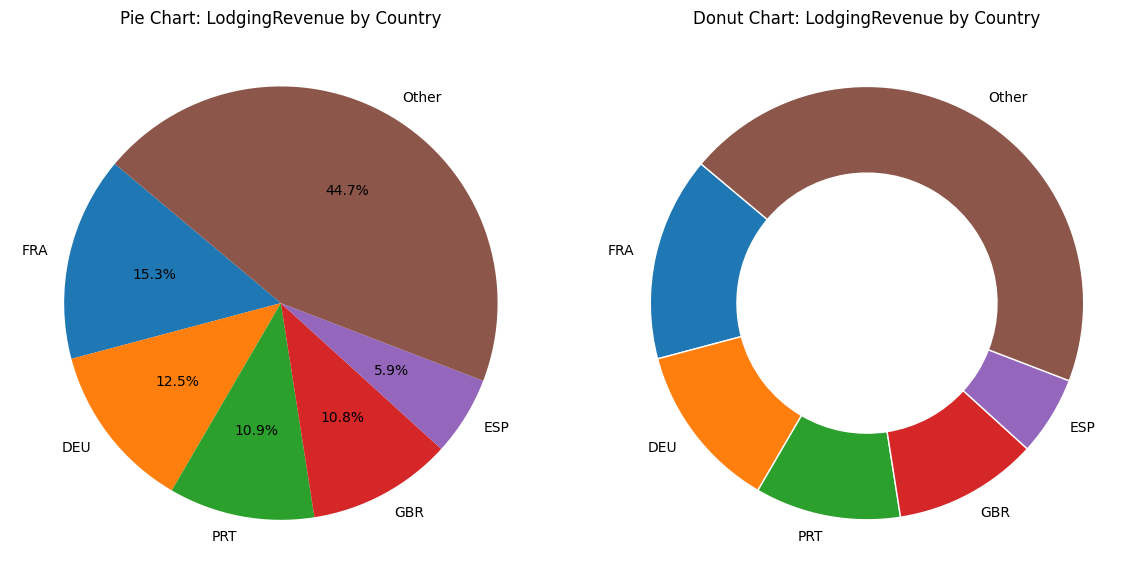

In [ ]:
 # Group the data by 'Nationality' and calculate the total LodgingRevenue for each country
revenue_by_country = hotels.groupby('Nationality')['LodgingRevenue'].sum().reset_index()

# Sort the data by LodgingRevenue in descending order
revenue_by_country_sorted = revenue_by_country.sort_values(by='LodgingRevenue', ascending=False)

# Select the top 5 countries
top_5_countries = revenue_by_country_sorted.head(5)

# Calculate the total LodgingRevenue for the 'other' category
other_revenue = revenue_by_country_sorted[5:]['LodgingRevenue'].sum()

# Create a new DataFrame with the top 5 countries and the 'other' category
combined_data = pd.concat([top_5_countries, pd.DataFrame({'Nationality': ['Other'], 'LodgingRevenue': [other_revenue]})])

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.subplot(121)  # Left subplot for the pie chart
plt.pie(combined_data['LodgingRevenue'], labels=combined_data['Nationality'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: LodgingRevenue by Country')

# Create a donut chart by drawing a white circle at the center
plt.subplot(122)  # Right subplot for the donut chart
plt.pie(combined_data['LodgingRevenue'], labels=combined_data['Nationality'], autopct='', startangle=140,
        wedgeprops=dict(width=0.4, edgecolor='w'))  # Width < 1 creates a hole
plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='white'))  # White circle for the donut
plt.title('Donut Chart: LodgingRevenue by Country')

# Display both charts
plt.tight_layout(pad=2)  # Adjust padding between subplots
plt.show()

# task 7: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france.

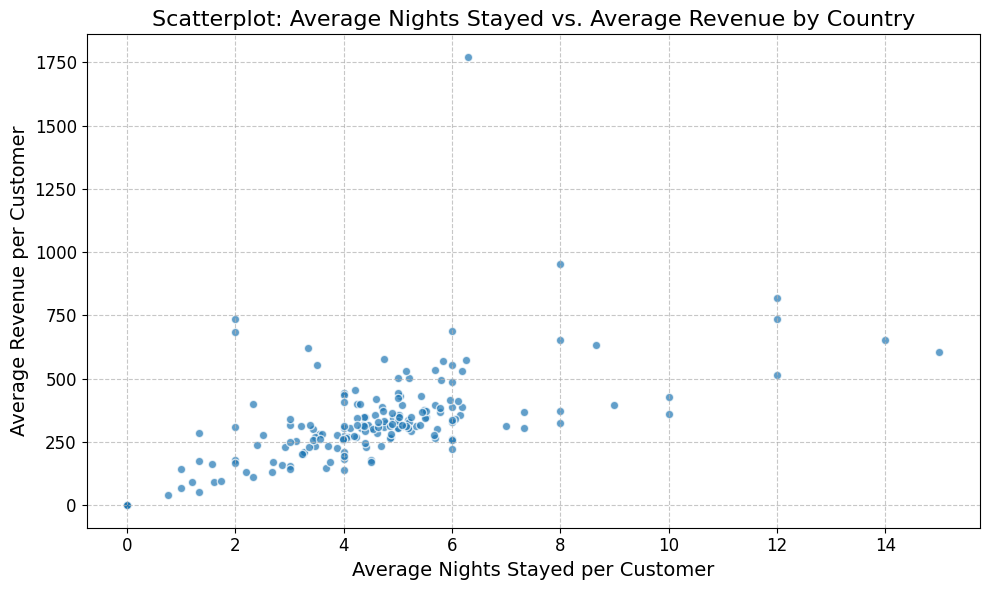

In [ ]:
# Group the data by 'Nationality' and calculate the mean for 'PersonsNights'
average_nights = hotels.groupby('Nationality')['PersonsNights'].mean()

# Group the data by 'Nationality' and calculate the mean for 'LodgingRevenue'
average_revenue = hotels.groupby('Nationality')['LodgingRevenue'].mean()

# Create a scatterplot
plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(
    average_nights,
    average_revenue,
    alpha=0.7,  # Adjust point transparency for overlapping points
    edgecolors='w',  # Add white edge colors for better visibility
)

# Add labels and title
plt.xlabel('Average Nights Stayed per Customer', fontsize=14)
plt.ylabel('Average Revenue per Customer', fontsize=14)
plt.title('Scatterplot: Average Nights Stayed vs. Average Revenue by Country', fontsize=16)

# Set font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

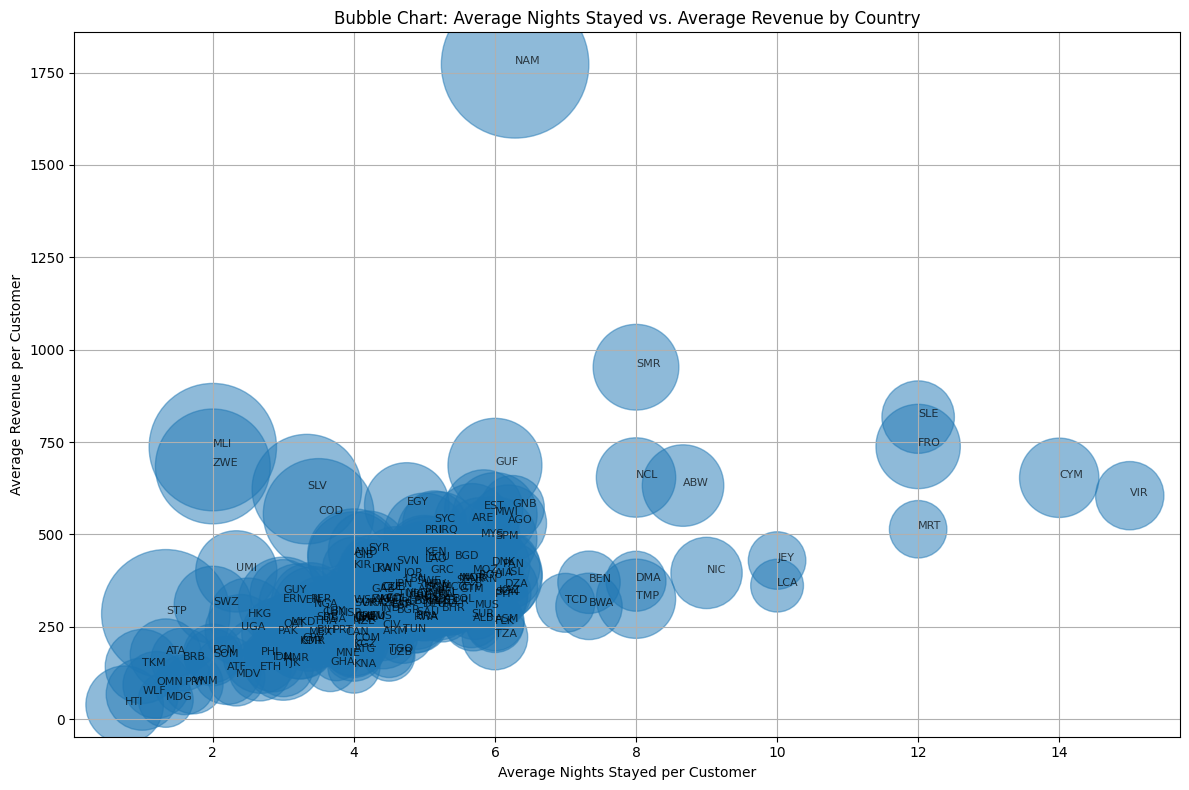

In [ ]:
# Group data by 'Nationality' and calculate the average nights stayed, average revenue per customer, and average nightly revenue.
country_stats = hotels.groupby('Nationality').agg({
    'PersonsNights': 'mean',
    'LodgingRevenue': 'mean',
    'RoomNights': 'mean'
}).reset_index()

# Calculate the average nightly revenue.
country_stats['AverageNightlyRevenue'] = country_stats['LodgingRevenue'] / country_stats['RoomNights']

# Create the bubble chart
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.scatter(
    country_stats['PersonsNights'],
    country_stats['LodgingRevenue'],
    s=country_stats['AverageNightlyRevenue'] * 20,  # Adjust the scaling factor as needed
    alpha=0.5
)

# Add labels and title
plt.xlabel('Average Nights Stayed per Customer')
plt.ylabel('Average Revenue per Customer')
plt.title('Bubble Chart: Average Nights Stayed vs. Average Revenue by Country')

# Annotate points with country labels
for i, row in country_stats.iterrows():
    plt.annotate(row['Nationality'], (row['PersonsNights'], row['LodgingRevenue']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

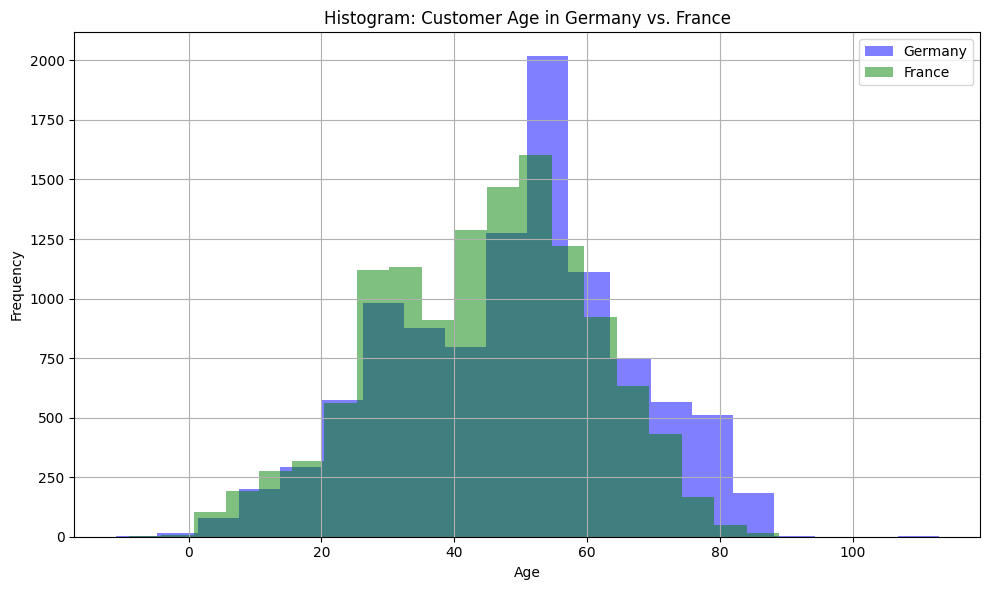

In [ ]:
# Filter data for customers from Germany and France
germany_customers = hotels[hotels['Nationality'] == 'DEU']
france_customers = hotels[hotels['Nationality'] == 'FRA']

# Create histograms for customer age in Germany and France
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Histogram for Germany
plt.hist(germany_customers['Age'], bins=20, alpha=0.5, label='Germany', color='blue')

# Histogram for France
plt.hist(france_customers['Age'], bins=20, alpha=0.5, label='France', color='green')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram: Customer Age in Germany vs. France')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Ensures labels are not cut off
plt.show()